# **Pawsome Pet Classifier: VGG16 Edition**
> *This notebook utilizes transfer learning with the VGG16 model to classify images of cats and dogs. It demonstrates how to preprocess the data, fine-tune the model, and evaluate its performance. By leveraging a pre-trained model, it achieves accurate classification results while providing insights into deep learning techniques for image classification tasks.*

# Image Classification Preparation and Model Setup

This code block is designed for preparing an image classification task using deep learning. It includes importing necessary libraries and setting up a convolutional neural network (CNN) model for image classification. Here's a breakdown of what each part does:

- **Library Imports**: Essential libraries such as `numpy`, `pandas`, `matplotlib`, `tensorflow`, and `keras` are imported for data manipulation, visualization, and deep learning model construction.
- **Model Architecture Setup**: Using `VGG16` as a base model, this section demonstrates how to customize a CNN by adding additional layers like `Dense`, `Flatten`, and `Dropout` to tailor the network for a specific image classification task.
- **Data Preparation**: Utilities to load datasets, split data into training and testing sets, and augment images for better model generalization are prepared.
- **Miscellaneous**: Setting up to ignore warnings to keep the output clean.

This setup is crucial for anyone looking to dive into image classification with deep learning, providing a solid foundation for model training and evaluation.

In [1]:
# Core libraries for data processing and mathematical operations
import zipfile
import numpy as np
import pandas as pd

# Visualization library
import matplotlib.pyplot as plt

# Deep learning libraries
import tensorflow as tf
from keras.applications import VGG16  # Pre-trained model for image classification
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout  # Layers for model customization
from tensorflow.keras.optimizers import Adam

# Dataset handling
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Image processing
import matplotlib.image as mpimg

# Standard libraries for file and random operations
import os
import random

# Data augmentation library for image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

2024-02-17 10:19:28.250883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 10:19:28.250986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 10:19:28.372834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Extracting Zip Files for Dogs vs. Cats Dataset

The following code extracts the contents of two zip files, `train.zip` and `test1.zip`, which are assumed to contain the training and testing datasets for a Dogs vs. Cats classification problem. The datasets are extracted into the current working directory (`"."`) for further processing.

In [2]:
# Import the zipfile module to work with zip files
import zipfile

# Define a function to extract a zip file to a specified directory
def extract_zip(input_zip, output_dir="."):
    """
    Extracts a zip file to the specified output directory.
    
    Parameters:
    - input_zip (str): The path to the zip file.
    - output_dir (str): The directory to extract the files into.
    """
    with zipfile.ZipFile(input_zip, "r") as z:
        z.extractall(output_dir)

# Paths to the zip files for training and testing datasets
train_zip_path = "/kaggle/input/dogs-vs-cats/train.zip"
test_zip_path = "/kaggle/input/dogs-vs-cats/test1.zip"

# Extract the training and testing datasets
extract_zip(train_zip_path)
extract_zip(test_zip_path)


# Creating a DataFrame with Image Labels

This snippet of code is designed to organize and label images from a training dataset, presumably consisting of images of cats and dogs. It reads the filenames from the "train" directory, then iterates through each filename to determine if the image is of a cat or a dog based on the presence of the substring in the filename. It then creates a pandas DataFrame with two columns: one for the filename and another for the corresponding label ('cat' or 'dog'). Finally, it displays the first few rows of the DataFrame to verify its structure.

In [3]:
# Import necessary libraries
import os
import pandas as pd

# Get a list of filenames in the "train" directory
filenames = os.listdir("train")

# Initialize an empty list to store labels
labels = []

# Loop through each filename to determine its label based on its name
for filename in filenames:
    if "cat" in filename:
        labels.append('cat')  # Append 'cat' if the filename contains "cat"
    elif "dog" in filename:
        labels.append('dog')  # Append 'dog' if the filename contains "dog"
    
# Create a DataFrame with filenames and their corresponding labels
df = pd.DataFrame({
    'Filename': filenames,
    'Label': labels
})

# Display the first five rows of the DataFrame
df.head()

,Filename,Label
0,cat.11632.jpg,cat
1,cat.8562.jpg,cat
2,dog.1674.jpg,dog
3,dog.9404.jpg,dog
4,cat.3791.jpg,cat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  25000 non-null  object
 1   Label     25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


# Displaying Images of Cats and Dogs

The `display_images` function is designed to display a specified number of images for a given category (either cats or dogs) from the "train" directory. It uses matplotlib to plot the images in a row, with each image's title indicating its category.

After defining this function, the code selects three random images of cats and three random images of dogs from the filenames list. It then calls `display_images` for each category, displaying the selected images. This visualization is helpful for verifying the data and the labels visually, ensuring that the dataset is correctly labeled and ready for further processing in machine learning models.

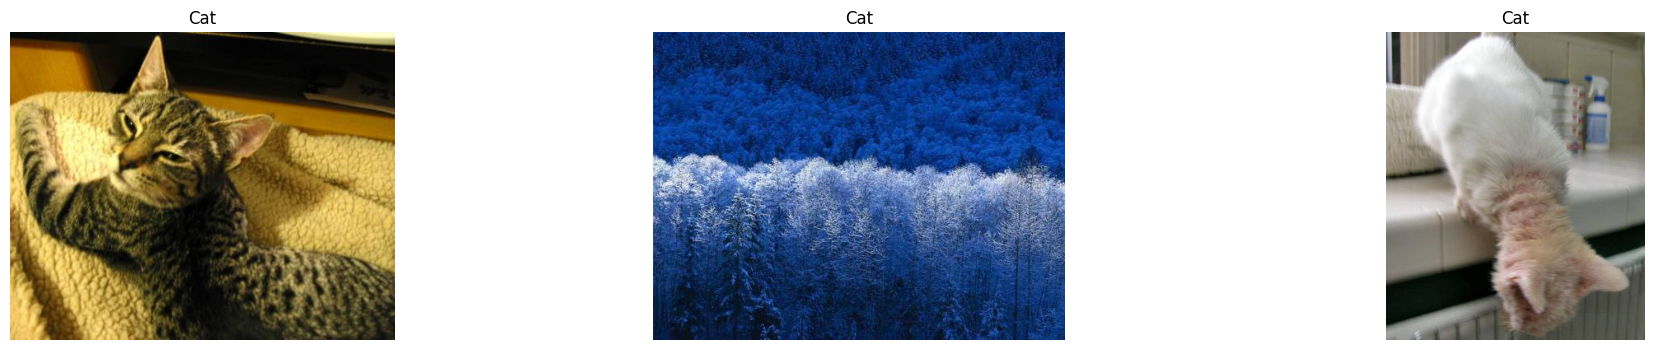

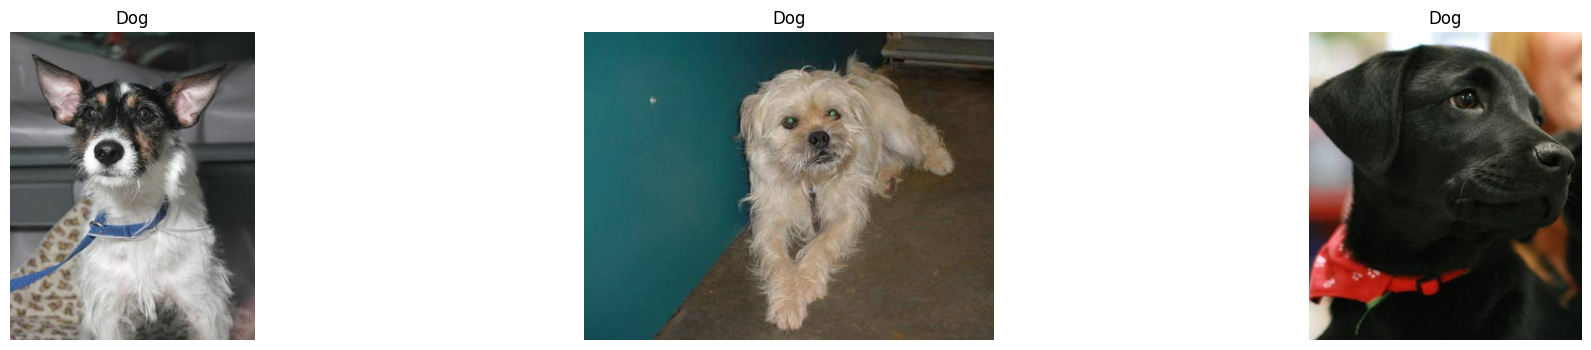

In [5]:
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg

# Function to display a specified number of images for a given category (cats or dogs)
def display_images(image_paths, category):
    plt.figure(figsize=(24, 4))  # Set figure size for the display
    for i, img_path in enumerate(image_paths):
        plt.subplot(1, 3, i + 1)  # Arrange images in a single row
        img = mpimg.imread(os.path.join('train', img_path))  # Read the image file
        plt.imshow(img)  # Display the image
        plt.title(category)  # Set the title to the category (cat or dog)
        plt.axis('off')  # Hide the axis for a cleaner look
    plt.show()  # Display the plot

# List all cat and dog filenames in the "train" directory
cat_images = [filename for filename in filenames if 'cat' in filename]
dog_images = [filename for filename in filenames if 'dog' in filename]

# Randomly select three images from each category
selected_cat_images = random.sample(cat_images, 3)
selected_dog_images = random.sample(dog_images, 3)

# Display the selected images for each category
display_images(selected_cat_images, 'Cat')
display_images(selected_dog_images, 'Dog')

# Image Data Generation for Training and Validation

This code segment prepares image data generators for training and validation using the `ImageDataGenerator` class from Keras. It rescales the pixel values of the images and splits the dataset into training and validation subsets.

In [6]:
# Define image dimensions and batch size
IMAGE_WIDTH, IMAGE_HEIGHT = 224, 224
BATCH_SIZE = 32

# Create an image data generator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generate training data from DataFrame with specified parameters
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='train/',
    x_col='Filename',
    y_col='Label',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Generate validation data from DataFrame with specified parameters
validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='train/',
    x_col='Filename',
    y_col='Label',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Loading and Freezing Pretrained VGG16 Model

This code segment loads the VGG16 model pretrained on ImageNet and freezes its layers to prevent them from being updated during training.

- The `VGG16` model is loaded with pretrained weights from ImageNet using the `weights='imagenet'` parameter.
- The `include_top=False` parameter excludes the fully connected layers from the model.
- The `input_shape` parameter specifies the input image dimensions.
- All layers of the base model are iterated through, and their `trainable` attribute is set to `False` to freeze them.


In [7]:
# Load the VGG16 model, pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


# Creating Custom Model on Top of Pretrained VGG16

This code segment creates a custom model by adding layers on top of the pretrained VGG16 model.

- The output of the VGG16 base model is flattened using `Flatten()` layer.
- A fully connected layer with 512 units and ReLU activation is added using `Dense` layer.
- Dropout regularization with a rate of 0.5 is applied to prevent overfitting.
- The final output layer with a single unit and sigmoid activation is added to perform binary classification.

In [8]:
# Create a custom model on top of the pretrained VGG16 model
x = Flatten()(base_model.output)  # Flatten the output of the base model
x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 units and ReLU activation
x = Dropout(0.5)(x)  # Apply dropout regularization to prevent overfitting
predictions = Dense(1, activation='sigmoid')(x)  # Add a final output layer with sigmoid activation for binary classification
model = Model(inputs=base_model.input, outputs=predictions)  # Define the input and output of the custom model

# Model Compilation

The provided code segment compiles the Keras model with the following configurations:

- **Optimizer:** Adam optimizer with a learning rate of 0.0001 is used for optimization.
- **Loss Function:** Binary crossentropy is employed as the loss function, suitable for binary classification tasks.
- **Metrics:** The model's performance is evaluated based on the accuracy metric.

This compilation step finalizes the model setup, specifying how it should be trained and evaluated during the training process.

In [9]:
# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Model Training

The provided code segment initiates the training of the Keras model with the following configurations:

- **Training Data:** The `train_generator` is used to provide training data batches.
- **Validation Data:** The `validation_generator` is used to provide validation data batches.
- **Steps per Epoch:** The number of steps per epoch is determined by `train_generator.samples // BATCH_SIZE`, ensuring that each sample in the training dataset is seen once per epoch.
- **Validation Steps:** Similarly, the number of validation steps per epoch is determined by `validation_generator.samples // BATCH_SIZE`.
- **Epochs:** The model is trained for 10 epochs.

This training procedure updates the model's weights using the training data, while also monitoring its performance on the validation data to prevent overfitting.

In [11]:
# Train the model with optimized configurations
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=10
)

Epoch 1/10


I0000 00:00:1708165209.586013      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 66s 92ms/step - loss: 0.3368 - accuracy: 0.8493 - val_loss: 0.2493 - val_accuracy: 0.8956
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.2391 - accuracy: 0.8990 - val_loss: 0.2264 - val_accuracy: 0.9016
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1961 - accuracy: 0.9180 - val_loss: 0.2221 - val_accuracy: 0.9028
Epoch 4/10
625/625 [==============================] - 56s 90ms/step - loss: 0.1689 - accuracy: 0.9305 - val_loss: 0.2777 - val_accuracy: 0.8814
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1388 - accuracy: 0.9441 - val_loss: 0.2252 - val_accuracy: 0.9078
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1200 - accuracy: 0.9527 - val_loss: 0.2627 - val_accuracy: 0.8990
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1004 - accuracy: 0.9613 - val_loss: 0.2366 - val_accuracy: 0.9094
Epo

# Model Evaluation

The provided code segment plots the training and validation accuracy of the model over epochs. The following details are illustrated:

- **X-axis:** Represents the number of epochs during model training.
- **Y-axis:** Indicates the corresponding accuracy values achieved by the model.
- **Training Accuracy:** The accuracy of the model on the training dataset.
- **Validation Accuracy:** The accuracy of the model on the validation dataset.
- **Title:** Title of the plot indicating "Model Accuracy over Epochs".
- **Legend:** Indicates the training and validation accuracy lines in the plot.

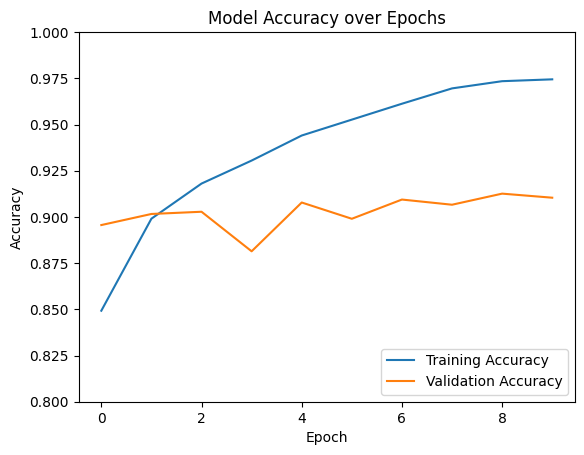

In [12]:
# Visualize model training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])  # Set y-axis limits for clarity
plt.legend(loc='lower right')
plt.title('Model Accuracy over Epochs')
plt.show()

# Model Fine-Tuning

The provided code segment unfreezes the last 10 layers of the base model for fine-tuning. It then compiles the model with the following configurations:
- **Optimizer:** Adam optimizer with a learning rate of 0.0001.
- **Loss Function:** Binary crossentropy, suitable for binary classification tasks.
- **Metrics:** Accuracy metric is used to evaluate the model's performance during training.


In [13]:
# Unfreeze the last 10 layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


## Continuing Training with Fine-Tuning

The provided code segment continues training the model with fine-tuning for additional epochs. It utilizes the same data generators used for initial training and evaluates the model's performance on the validation data. Adjust the number of epochs as needed for further training.

In [14]:
# Continue training the model with fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10 
)

Epoch 1/10
625/625 [==============================] - 88s 133ms/step - loss: 0.2926 - accuracy: 0.8761 - val_loss: 0.1250 - val_accuracy: 0.9501
Epoch 2/10
625/625 [==============================] - 83s 132ms/step - loss: 0.1228 - accuracy: 0.9513 - val_loss: 0.0881 - val_accuracy: 0.9629
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 0.0669 - accuracy: 0.9748 - val_loss: 0.1336 - val_accuracy: 0.9433
Epoch 4/10
625/625 [==============================] - 83s 132ms/step - loss: 0.0515 - accuracy: 0.9811 - val_loss: 0.0688 - val_accuracy: 0.9744
Epoch 5/10
625/625 [==============================] - 82s 131ms/step - loss: 0.0427 - accuracy: 0.9840 - val_loss: 0.0795 - val_accuracy: 0.9702
Epoch 6/10
625/625 [==============================] - 82s 131ms/step - loss: 0.0364 - accuracy: 0.9866 - val_loss: 0.0941 - val_accuracy: 0.9704
Epoch 7/10
625/625 [==============================] - 83s 132ms/step - loss: 0.0309 - accuracy: 0.9895 - val_loss: 0.1149 - val_ac

# Evaluating the Fine-Tuned Model

This code segment visualizes the accuracy of the fine-tuned model over epochs. It plots both training and validation accuracy to assess the model's performance after fine-tuning. Adjust the y-axis limits as needed for better visualization.

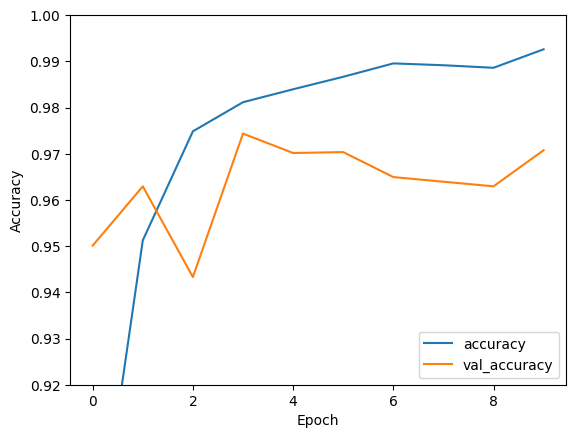

In [15]:
# Visualize the accuracy of the fine-tuned model
plt.plot(history_fine.history['accuracy'], label='accuracy')
plt.plot(history_fine.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.92, 1])
plt.legend(loc='lower right')

# Loading and Preparing Test Data

This code segment extracts the test data from the provided ZIP file and creates a DataFrame to store the filenames of the test images. The DataFrame allows easy access to the test data for further processing or evaluation.


In [16]:
# Extracting the test data from the ZIP file
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as test1_zip:
    test1_zip.extractall('.') 

# Define the directory path for the test data
test_dir = "../working/test1/"

# List the filenames of the test images
filenames = os.listdir(test_dir)

# Create a DataFrame to store the filenames of the test images
test_data = pd.DataFrame({"Filename": filenames})

# Display the first few rows of the test data DataFrame
test_data.head()

,Filename
0,18.jpg
1,403.jpg
2,4460.jpg
3,9880.jpg
4,7188.jpg


# Preparing Test Data Generator

This code segment sets up an ImageDataGenerator to preprocess the test data and creates a generator to yield batches of test images. The generator allows efficient processing of large test datasets in batches, which is essential for evaluation or prediction tasks.

In [17]:
# Create an ImageDataGenerator for test data preprocessing
test_gen = ImageDataGenerator(rescale=1./255)

# Generate batches of test data from the DataFrame
test_generator = test_gen.flow_from_dataframe(
    dataframe=test_data,
    directory='test1/',
    x_col='Filename',
    y_col=None,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode=None,
)

Found 12500 validated image filenames.


# Performing Predictions on Test Data

This code snippet utilizes the trained model to perform predictions on the test data generated by the test data generator. The `predict` method of the model is called on the test generator to obtain the predictions for each image in the test dataset. The resulting array contains the predicted probabilities for each image being in the positive class (dog).


In [18]:
# Perform predictions on the test data using the trained model
test1_predict = model.predict(test_generator)
test1_predict

391/391 [==============================] - 29s 73ms/step


array([[4.1075476e-23],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.0463119e-25],
       [0.0000000e+00],
       [1.0000000e+00]], dtype=float32)

# Assigning Labels to Test Data

In this code snippet, a threshold of 0.5 is set for binary classification. The predicted probabilities obtained earlier are compared to this threshold, and based on the comparison, labels ('dog' or 'cat') are assigned to the test data. If the predicted probability is greater than the threshold, the label is set to 'dog'; otherwise, it is set to 'cat'.

In [19]:
# Set the threshold for binary classification
threshold = 0.5

# Assign labels to the test data based on the predicted probabilities
test_data['Label'] = np.where(test1_predict > threshold, 'dog', 'cat')

# Numerical Encoding of Labels

In this code snippet, the labels in the 'Label' column of the test data DataFrame are replaced with numerical equivalents. 'dog' is replaced with 1, and 'cat' is replaced with 0. This encoding allows for easier analysis and comparison of the labels in numerical form.

In [20]:
test_data['Label'] = test_data['Label'].replace({ 'dog': 1, 'cat': 0 })

In [21]:
test_data.tail()

,Filename,Label
12495,12090.jpg,0
12496,6153.jpg,1
12497,9255.jpg,0
12498,3503.jpg,0
12499,9113.jpg,1


# Sample Test Images with Predicted Labels

In this code snippet, a sample of 6 test images along with their predicted labels are displayed using Matplotlib. The 'sample_test' DataFrame contains randomly selected rows from the test data, and for each row, the corresponding image is loaded and displayed along with its predicted label. The titles of the subplots represent the predicted labels ('dog' or 'cat').

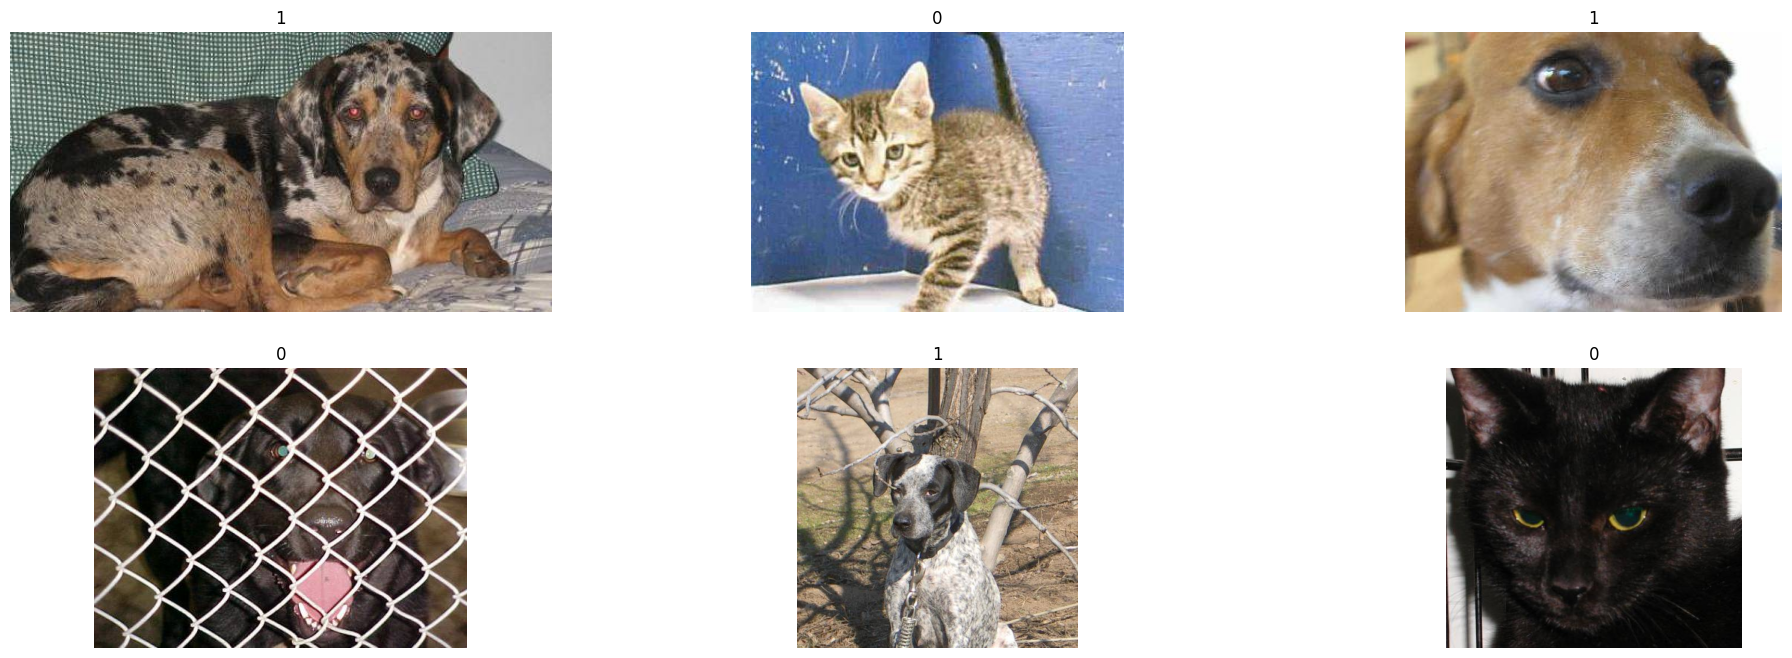

In [22]:
# Display a sample of test images with predicted labels
sample_test = test_data.sample(n=6)
plt.figure(figsize=(24, 8))

subplot_index = 1
for _, row in sample_test.iterrows():
    image_path = os.path.join(test_dir, row['Filename'])
    img = mpimg.imread(image_path)
    plt.subplot(2, 3, subplot_index)
    plt.imshow(img)
    plt.title(row['Label'])
    plt.axis('off')
    subplot_index += 1

plt.show()

# Submission DataFrame Preparation

In this code snippet, the 'test_data' DataFrame is copied to 'submission_df' for preparing the submission file. The 'id' column is extracted from the 'Filename' column by removing the file extension, and the 'label' column is renamed from 'Label'. Finally, the 'Filename' column is dropped, and the resulting DataFrame is saved to a CSV file named 'submission.csv'.


In [23]:
submission_df = test_data.copy()
submission_df['id'] = submission_df['Filename'].str.split('.').str[0]
submission_df['label'] = submission_df['Label']
submission_df.drop(['Filename'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

---
Enjoyed this notebook? Feel free to give it an **upvote** if you found it helpful or interesting! Your support is greatly appreciated. Happy coding! 😊🚀
___